# Notebook 7: Seeing the Problem as Data

## Part 1: Is Covid Real?

Suprisingly, this was a hotly debated question in the early months of Covid. Many people suggested that the very existence of Covid was a "hoax" or that it was no worse than the flu. As we know, social media has allowed conspiracy theories and misinformation to spread easily and quickly among people.

Fortunately, data is a powerful tool to help us see a problem clearly. Let's see if we can use data to set the record straight!

Chicago is the third-largest city in the United States, with an estimated 2.71 million people living within the city's limits. This is _approximately_ the size of 19th century London (2.5 million).

<br>

<table><tr>
    <td> <img src="https://raw.githubusercontent.com/uchicago-dsi/2023-data4all/main/imgs/chicago_zip_map.jpeg?raw=true" alt="Drawing" width="600"> </td>
</tr></table>

<br>

How do we know there's a problem? We have gathered some data from the Illinois Department of Public Health. Specifically, how many people in Chicago have died each year form 2012 to 2021. What does this data tell us?

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

years = list(range(2012,2022))
chicago_total_deaths = [18911, 18825, 19003, 19308, 19809, 19742, 19660, 19630, 25769, 22882]
chicago_populations = [2714856, 2718782, 2722389, 2720546, 2704958, 2716450, 2705994, 2693976, 2741730, 2696555]

Chicago = pd.DataFrame(list(zip(years, chicago_total_deaths, chicago_populations)), columns=['year', 'deaths', 'population'])
Chicago

,year,deaths,population
0,2012,18911,2714856
1,2013,18825,2718782
2,2014,19003,2722389
3,2015,19308,2720546
4,2016,19809,2704958
5,2017,19742,2716450
6,2018,19660,2705994
7,2019,19630,2693976
8,2020,25769,2741730
9,2021,22882,2696555


In [2]:
# Task 1: Normalize the number of deaths in Chicago by creating a new column: “deaths_per_1000”

Chicago['deaths_per_1000'] = Chicago["deaths"] / Chicago["population"] * 1000

Chicago

,year,deaths,population,deaths_per_1000
0,2012,18911,2714856,6.965747
1,2013,18825,2718782,6.924056
2,2014,19003,2722389,6.980266
3,2015,19308,2720546,7.097105
4,2016,19809,2704958,7.323219
5,2017,19742,2716450,7.267573
6,2018,19660,2705994,7.265352
7,2019,19630,2693976,7.286628
8,2020,25769,2741730,9.398810
9,2021,22882,2696555,8.485642


We can also visualize this data with a line graph.

Source: https://dph.illinois.gov/data-statistics/vital-statistics/death-statistics.html


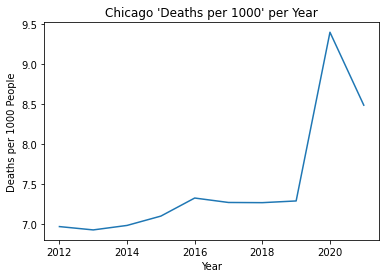

In [3]:
plt.plot(Chicago['year'], Chicago['deaths_per_1000'])
plt.title("Chicago 'Deaths per 1000' per Year")
plt.xlabel("Year")
plt.ylabel("Deaths per 1000 People")

print("Source: https://dph.illinois.gov/data-statistics/vital-statistics/death-statistics.html")

------------------------------------------

<br>

<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width=15px/> <font size="4"> **Journal 7a:** From Cholera to COVID</font>

We did a similar study of deaths in London to identify the years that cholera outbreaks occurred. How would you use the above data to argue against the suggestion that Covid was a "hoax"?

> Write your answer here!

<br>

<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/save-icon.jpeg?raw=true" alt="Drawing" align=left width=20px/> <font size="4">    **&ensp;&ensp;&ensp;Stop and save your work!** </font>

## Part 2: Research is 'Standing on the Shoulders of Giants'
In May 2020, Kevin Credit from the Center for Spatial Data Science at the UChicago wrote "Neighborhood inequity: Exploring the factors underlying racial and ethnic disparities in COVID-19 testing and infection rates using ZIP code data in Chicago and New York".

Fortunately at the conclusion of publishing this paper, Kevin shared his data with us! This poses one important question:

Kevin's research also would not have been possible without open source research data from:
Illinois Department of Health: https://www.dph.illinois.gov/covid19/covid19-statistics

U.S. Census Bureau: https://data.census.gov/cedsci


In [4]:
# Next we load our data into a usable format and view the first few rows

frame = pd.read_csv("https://raw.githubusercontent.com/uchicago-dsi/2023-data4all/main/Datasets/cov_chi_with_positivity_lite.csv")
frame.head()

,ZCTA5CE10,ZIP,POP,P0_44,P45_64,P65_,PER65,MEDINC,PERNOINS,PERW,...,PERAUTO,PERTRAN,PERPEDB,PERTELE,FDTRTPER,WS_5,POPDENS,PERCROWD,CASE4_16,TEST4_16
0,60601,60601,14675,9432,3168,2075,0.141397,103243,0.029972,0.659421,...,0.261451,0.178218,0.449679,0.077467,0.000000,55.353747,0.015708,0.004850,35,189
1,60605,60605,27519,18480,6470,2569,0.093354,111164,0.026408,0.573458,...,0.346656,0.286901,0.258748,0.068008,0.000000,47.900487,0.008531,0.024850,74,441
2,60606,60606,3101,1964,706,431,0.138987,131477,0.023632,0.686553,...,0.242353,0.149804,0.431373,0.127451,0.000000,55.775578,0.005443,0.024512,22,132
3,60607,60607,29591,23912,4075,1604,0.054206,93508,0.033990,0.521780,...,0.362396,0.267698,0.285297,0.062024,0.000000,61.040068,0.004992,0.029603,143,526
4,60608,60608,79205,54670,16683,7852,0.099135,44043,0.151609,0.191251,...,0.559437,0.287764,0.100713,0.032950,0.166667,61.559835,0.004852,0.063219,381,1269


In [5]:
# Since there are so many columns, let's list them

cols = frame.columns.tolist()
print(cols)

['ZCTA5CE10', 'ZIP', 'POP', 'P0_44', 'P45_64', 'P65_', 'PER65', 'MEDINC', 'PERNOINS', 'PERW', 'PERHIS', 'PERBLK', 'PERASN', 'PEROFFTC', 'PERHSRV', 'PERPSRV', 'PERFOOD', 'PERCLEAN', 'PERAUTO', 'PERTRAN', 'PERPEDB', 'PERTELE', 'FDTRTPER', 'WS_5', 'POPDENS', 'PERCROWD', 'CASE4_16', 'TEST4_16']


_____________________________________________________________________
It's not always easy to know what a column name means.

Thankfully, Kevin's data are accompanied by a comprehensive variable guide!

**NOTE: after the variable guide, there is a cell where you can peek at each variable. Give it a try!**

_____________________________________________________________________

**Population**

`POP`: Total population

`P0_44`: Number of people ages 0 to 44

`P45_64`: Number of people ages 45 to 64:

`P65_`: Number of people ages 65 and older

<p>&nbsp;</p>

**Socio-economic status**

`MEDINC`: Median household income

`PERNOINS`: Percent without health insurance

<p>&nbsp;</p>

**Racial/Ethnic neighbourhood types**

`BLKNH`: Black non-Hispanic-Majority Neighborhood  

`HISPNH`: Hispanic-Majority Neighborhood  

`WNH`: White non-Hispanic-Majority Neighborhood

`PERASN`: Asian-Majority Neighborhood

<p>&nbsp;</p>

**Occupations**
`PEROFFTC`: Percent office and telecommute workers

`PERHSRV`: Percent healthcare service workers

`PERPSRV`: Percent public service workers

`PERFOOD`: Percent food service workers

`PERCLEAN`: Percent cleaning service workers

<p>&nbsp;</p>

**How people get to work**

`PERAUTO`: Percent personal automobile commuters

`PERTRAN`: Percent public transportation commuters

`PERPEDB`: Percent pedestrian and bike commuters

`PERTELE`: Percent telecommuters (work from home)


<p>&nbsp;</p>

**Built environments**

`FDTRTPER`: Percent food desert tracts

`WS_5`: Hospital accessibility score

`POPDENS`: Population density (per square meter)  

`PERCROWD`: Percent housing units w/ > 1 person per room

<p>&nbsp;</p>


**COVID-19**

`CASE4_16`: Number of positive cases the week ending 4/16  

`TEST4_16`: Number of tests performed the week ending 4/16


In [7]:
# Use this cell to explore the different variables by changing the name inside. 
# Remove '.head()' to see all of the data!
frame['FDTRTPER'].head()


0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.166667
Name: FDTRTPER, dtype: float64

<br>
<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width=15px/> <font size="4"> **Task 2:** Variable Identification</font>

Identify variables from the dataset that could be used to measure Covid's impact on communities.  

> Write your answer here!

<br>

<br>
<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/save-icon.jpeg?raw=true" alt="Drawing" align=left width=20px/> <font size="4">     **&ensp;&ensp;&ensp;Stop and save your work!** </font>

________________________________________________________________

## Part 3: Creating New Data

First we want to examine the `case rate`: **the percentage of the population that has COVID-19**.

You'll notice that there is *not* already a case rate variable in Kevin's data -- this means we need to construct it ourselves!

In Python, we can do this by "declaring a function" that inputs **something** and outputs the case rate. In this case **something** is the total number of cases and the population size. The function says how to use these inputs to **return** a value, in this case, the case rate.

In [8]:
# This is a function! If you run this cell nothing happens.
# Why do you think that is?

def case_rate(total_cases, population):
    cases_over_population = total_cases / population
    return cases_over_population * 100  # Why multiply it by 100?

In [10]:
# Generate a new column of data for the week of 4/16 called “case_rate_4_16” 
# using the “case_rate” function for April 16th, 2020 

frame['case_rate_4_16'] = case_rate(frame["CASE4_16"], frame["POP"])

# Next we can preview our new data to see if they pass the **smell-test**!

frame['case_rate_4_16'].head()

0    0.238501
1    0.268905
2    0.709449
3    0.483255
4    0.481030
Name: case_rate_4_16, dtype: float64

<br>
<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width=15px/> <font size="4"> **Journal 7b:** Case Rate 'Smell Test'</font>

What do the values for `case_rate_4_16` mean? Does your generated numbers appear to be a reasonable size (not too big and not too small)?  

> Write your answer here!

<br>


<br>

Next, we want to consider the **testing rate: the total percentage of the population that got tested!**

**Don't forget to preview your new data field to ensure everything looks good!**

<br>

In [12]:
# Make a function called “test_rate” that normalizes test rate
# HINT: it looks a LOT like the case_rate function

def test_rate(total_tests, population):
    tests_over_population = total_tests / population
    return tests_over_population * 100


In [13]:
# Generate a new column of data for the week of 4/16 called 
# “test_rate_4_16” using the “test_rate” function.

frame["test_rate_4_16"] = test_rate(frame["TEST4_16"], frame["POP"])

# Preview our new data
frame['test_rate_4_16'].head()

0    1.287905
1    1.602529
2    4.256691
3    1.777568
4    1.602172
Name: test_rate_4_16, dtype: float64

<br>

<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/save-icon.jpeg?raw=true" alt="Drawing" align=left width=20px/> <font size="4">     **&ensp;&ensp;&ensp;Stop and save your work!** </font>

## Part 4: Positivity Rate

Now that you have some experience building and using functions, let's apply it to build our desired outcome variable, **positivity rate**!

<img src = "https://raw.githubusercontent.com/uchicago-dsi/2023-data4all/main/imgs/pos_rate.png?raw=true" width="700"/>

In [14]:
# Define a function called "pos_rate" that calculates positivity rate 

def pos_rate(cases, tests):
    cases_over_tests = cases / tests
    return cases_over_tests * 100


In [15]:
# Using your pos_rate function, create a new 
# column in the dataframe for the week of 4/16 called “pos_rate_4_16”

frame["pos_rate_4_16"] = pos_rate(frame["CASE4_16"], frame["TEST4_16"])

# Preview our new data

frame['pos_rate_4_16'].head()

0    18.518519
1    16.780045
2    16.666667
3    27.186312
4    30.023641
Name: pos_rate_4_16, dtype: float64

## Congratulations! You've just created your very own outcome variable!

Positivity rate enables us as researchers to see the impact of COVID, even when the total number of tests completed is low. In the upcoming exercises we will visualize and test your new variable of interest (among others!)

<br>

<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/save-icon.jpeg?raw=true" alt="Drawing" align=left width=20px/> <font size="4">     **&ensp;&ensp;&ensp;Stop and save your work!** </font>